In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Data Preprocessing: removing unwanted columns, in categorical columns replace insignificant categories with 'others', checking for any null or duplicate values,removing outliers, encoding categorical variables, splitting into test and train**

In [53]:
import pandas as pd
import numpy as np

In [54]:
df=pd.read_csv("/kaggle/input/housedata/data.csv")

In [55]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [56]:
df.shape

(4600, 18)

In [57]:
df['country'].nunique()

1

In [58]:
df['street'].nunique()

4525

In [59]:
df.drop(columns=['date','country','street'],inplace=True)

In [60]:
df['statezip'].nunique()

77

In [61]:
df['statezip'].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [62]:
arr=df['statezip'].value_counts()<100

In [63]:
required=arr[arr.values==True].index
required

Index(['WA 98034', 'WA 98053', 'WA 98074', 'WA 98038', 'WA 98027', 'WA 98023',
       'WA 98058', 'WA 98133', 'WA 98125', 'WA 98033', 'WA 98029', 'WA 98155',
       'WA 98040', 'WA 98092', 'WA 98056', 'WA 98075', 'WA 98144', 'WA 98118',
       'WA 98126', 'WA 98004', 'WA 98065', 'WA 98112', 'WA 98199', 'WA 98028',
       'WA 98001', 'WA 98168', 'WA 98106', 'WA 98031', 'WA 98122', 'WA 98116',
       'WA 98072', 'WA 98166', 'WA 98107', 'WA 98136', 'WA 98198', 'WA 98146',
       'WA 98177', 'WA 98077', 'WA 98045', 'WA 98008', 'WA 98105', 'WA 98119',
       'WA 98178', 'WA 98003', 'WA 98108', 'WA 98019', 'WA 98030', 'WA 98007',
       'WA 98002', 'WA 98011', 'WA 98109', 'WA 98005', 'WA 98070', 'WA 98022',
       'WA 98055', 'WA 98102', 'WA 98188', 'WA 98014', 'WA 98032', 'WA 98148',
       'WA 98057', 'WA 98039', 'WA 98024', 'WA 98010', 'WA 98051', 'WA 98047',
       'WA 98288', 'WA 98050', 'WA 98354', 'WA 98068'],
      dtype='object', name='statezip')

In [64]:
df.loc[df['statezip'].isin(required), 'statezip'] = 'others'

In [65]:
df['city'].nunique()

44

In [66]:
arr1=df['city'].value_counts()<100

In [67]:
required1=arr1[arr1.values==True].index
required1

Index(['Maple Valley', 'Mercer Island', 'Burien', 'Snoqualmie', 'Kenmore',
       'Des Moines', 'North Bend', 'Covington', 'Duvall', 'Lake Forest Park',
       'Bothell', 'Newcastle', 'SeaTac', 'Tukwila', 'Vashon', 'Enumclaw',
       'Carnation', 'Normandy Park', 'Clyde Hill', 'Medina', 'Fall City',
       'Black Diamond', 'Ravensdale', 'Pacific', 'Algona', 'Yarrow Point',
       'Skykomish', 'Preston', 'Milton', 'Inglewood-Finn Hill',
       'Snoqualmie Pass', 'Beaux Arts Village'],
      dtype='object', name='city')

In [68]:
df.loc[df['city'].isin(required1), 'city'] = 'others'

In [69]:
df.duplicated().sum()

0

In [70]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
statezip         0
dtype: int64

In [71]:
import matplotlib.pyplot as plt

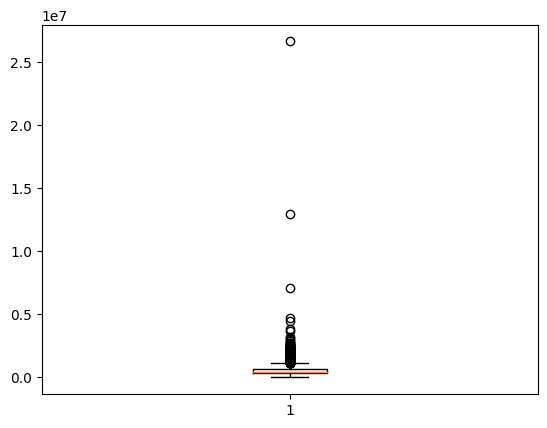

In [72]:
plt.boxplot(df['price'])
plt.show()

In [73]:
Q1=df['price'].describe()['25%']
Q3=df['price'].describe()['75%']
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR
low_limit=low_limit if low_limit>0 else 0

In [74]:
df[df['price']>=high_limit]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,others
11,1.400000e+06,4.0,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,Seattle,others
14,1.200000e+06,5.0,2.75,2910,9480,1.5,0,0,3,2910,0,1939,1969,Seattle,others
99,1.395000e+06,5.0,3.50,4010,8510,2.0,0,1,5,2850,1160,1971,0,Seattle,others
122,2.280000e+06,7.0,8.00,13540,307752,3.0,0,4,3,9410,4130,1999,0,Redmond,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,2.199900e+06,4.0,1.50,1120,5427,1.0,0,0,3,1120,0,1969,2014,others,WA 98042
4350,2.659000e+07,3.0,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,Kent,others
4465,2.560498e+06,3.0,2.50,1710,1664,2.0,0,0,5,1300,410,2003,0,Seattle,others
4467,1.337044e+06,4.0,3.50,4280,9583,2.0,0,0,3,4280,0,2005,0,Bellevue,others


In [75]:
df = df[(df['price'] >= low_limit) & (df['price'] <= high_limit)]


In [76]:
X=df.drop(columns='price')
Y=df['price']

In [77]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

In [78]:
trf1=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first'),['city','statezip'])
],remainder='passthrough')

In [79]:
x_train_1=trf1.fit_transform(x_train)

In [80]:
x_test_1=trf1.transform(x_test)

# **Training the model : importing all the models from sklearn , training on them and comparing based on the regression metrices.**

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import xgboost as xgb


In [82]:
lr=LinearRegression()
lr.fit(x_train_1,y_train)

LinearRegression()

In [83]:
y_pred=lr.predict(x_test_1)

In [84]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

MSE: 18506257714.413548
MAE: 93425.40255746116
r2_score: 0.6211914186507606


In [85]:
model1=DecisionTreeRegressor(max_depth=6,random_state=12)
model1.fit(x_train_1,y_train)

DecisionTreeRegressor(max_depth=6, random_state=12)

In [86]:
y_pred1=model1.predict(x_test_1)

In [87]:
print("MSE:", mean_squared_error(y_test, y_pred1))
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("r2_score:", r2_score(y_test, y_pred1))

MSE: 22631347965.76686
MAE: 109258.66168505521
r2_score: 0.5367540564262152


In [88]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(x_train_1, y_train)

RandomForestRegressor(random_state=42)

In [91]:
y_pred2=model2.predict(x_test_1)

In [92]:
print("MSE:", mean_squared_error(y_test, y_pred2))
print("MAE:", mean_absolute_error(y_test, y_pred2))
print("r2_score:", r2_score(y_test, y_pred2))

MSE: 18835693126.868168
MAE: 93506.9571252583
r2_score: 0.6144481341270105


In [93]:
model3 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model3.fit(x_train_1, y_train)

GradientBoostingRegressor(random_state=42)

In [94]:
y_pred3 = model3.predict(x_test_1)

In [95]:
print("MSE:", mean_squared_error(y_test, y_pred3))
print("MAE:", mean_absolute_error(y_test, y_pred3))
print("r2_score:", r2_score(y_test, y_pred3))

MSE: 18300424862.088722
MAE: 93824.64243594294
r2_score: 0.6254046557075161


In [96]:
model4 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model4.fit(x_train_1, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [97]:
y_pred4 = model4.predict(x_test_1)

In [98]:
print("MSE:", mean_squared_error(y_test, y_pred4))
print("MAE:", mean_absolute_error(y_test, y_pred4))
print("r2_score:", r2_score(y_test, y_pred4))

MSE: 18193052168.912834
MAE: 92193.79532952754
r2_score: 0.6276024905267041


In [99]:
model5= SVR( C=100, epsilon=0.1)
model5.fit(x_train_1, y_train)

SVR(C=100)

In [100]:
y_pred5 = model5.predict(x_test_1)

In [101]:
print("MSE:", mean_squared_error(y_test, y_pred5))
print("MAE:", mean_absolute_error(y_test, y_pred5))
print("r2_score:", r2_score(y_test, y_pred5))

MSE: 51115164808.06347
MAE: 176539.21574869315
r2_score: -0.046287335083115


# **# Trying to increase the R2 scores by standardising numerical input**** **


In [102]:
categorical_cols = ['city', 'statezip']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

In [103]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
])

# **Using grid_search_cv in Random_Forest, Support_vector_machines and Xgboost to get the best hyper parameters and also using pipelines**

In [104]:
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(x_train, y_train)

print("Random Forest Best R2:", rf_grid.best_score_)
print("Test R2:", r2_score(y_test, rf_grid.predict(x_test)))


Random Forest Best R2: 0.5704251425375604
Test R2: 0.6236838531411992


In [105]:
xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', xgb.XGBRegressor(random_state=42, objective='reg:squarederror'))
])

xgb_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6],
    'model__learning_rate': [0.1, 0.05]
}

xgb_grid = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=3, scoring='r2', n_jobs=-1)
xgb_grid.fit(x_train, y_train)

print("XGBoost Best R2:", xgb_grid.best_score_)
print("Test R2:", r2_score(y_test, xgb_grid.predict(x_test)))


XGBoost Best R2: 0.5794477480453567
Test R2: 0.6319285168674555


In [107]:
svr_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', SVR())
])

svr_param_grid = {
    'model__kernel': ['rbf', 'linear'],
    'model__C': [1, 10, 100],
    'model__epsilon': [0.1, 0.2, 0.5],
    'model__gamma': ['scale', 'auto']
}

svr_grid = GridSearchCV(svr_pipeline, svr_param_grid,cv=3,scoring='r2',n_jobs=-1,)
svr_grid.fit(x_train, y_train)


y_pred_svr = svr_grid.predict(x_test)

print("SVR Best R2:", svr_grid.best_score_)
print(" Test R2 Score:", r2_score(y_test, y_pred_svr))


SVR Best R2: 0.372126342433385
 Test R2 Score: 0.4722713018062027
